#### DATA ANALYSIS ON BIKE DOCKS IN CHICAGO
sleegal.ai Take Home Challenge

by Allen Wang

Import data libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import data on bike rides on Q4

In [14]:
df1 = pd.read_csv('Divvy_Stations_2014-Q3Q4.csv')

In [15]:
df1.head()

,id,name,latitude,longitude,dpcapacity,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55


In [16]:
df2 = pd.read_csv('Divvy_Trips_2014-Q4.csv')

In [17]:
df2.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4413167,12/31/2014 23:54,12/31/2014 23:57,1880,193,296,Broadway & Belmont Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1989.0
1,4413166,12/31/2014 23:50,12/31/2014 23:52,1153,161,264,Stetson Ave & South Water St,44,State St & Randolph St,Subscriber,Male,1984.0
2,4413165,12/31/2014 23:48,1/1/2015 0:38,1946,3002,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Customer,NaN,NaN
3,4413164,12/31/2014 23:46,1/1/2015 0:37,2563,3084,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Subscriber,Male,1987.0
4,4413163,12/31/2014 23:44,1/1/2015 0:10,389,1570,43,Michigan Ave & Washington St,163,Damen Ave & Clybourn Ave,Subscriber,Male,1983.0


In [18]:
df2.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

Change date columns to datetime objects

In [19]:
df2['starttime'] = pd.to_datetime(df2['starttime'])

In [20]:
df2['stoptime'] = pd.to_datetime(df2['stoptime'])

Check for null values

In [21]:
df1.isnull().sum()

id             0
name           0
latitude       0
longitude      0
dpcapacity     0
dateCreated    0
dtype: int64

In [22]:
df2.isnull().sum()

trip_id                  0
starttime                0
stoptime                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               69589
birthyear            69554
dtype: int64

In [23]:
df2.shape

(437965, 12)

Creating two separate datasets by merging Q4 bike data with bike dock location data. One dataset is merged on the from_station and one is merged on the to_station to the bike dock location data. This is to help determine if the 'from' location is more important than the 'to' location.

In [24]:
merged_df_from = pd.merge(left=df2, right=df1, left_on='from_station_id', right_on='id')

In [25]:
merged_df_to = pd.merge(left= df2, right = df1, left_on = 'to_station_id', right_on = 'id')

In [26]:
merged_df_from.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,id,name,latitude,longitude,dpcapacity,dateCreated
0,4413167,2014-12-31 23:54:00,2014-12-31 23:57:00,1880,193,296,Broadway & Belmont Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1989.0,296,Broadway & Belmont Ave,41.940106,-87.645451,15,9/17/2013 17:48
1,4413055,2014-12-31 19:51:00,2014-12-31 19:55:00,1877,236,296,Broadway & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1980.0,296,Broadway & Belmont Ave,41.940106,-87.645451,15,9/17/2013 17:48
2,4412350,2014-12-31 14:19:00,2014-12-31 14:33:00,744,822,296,Broadway & Belmont Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1995.0,296,Broadway & Belmont Ave,41.940106,-87.645451,15,9/17/2013 17:48
3,4412148,2014-12-31 13:07:00,2014-12-31 13:09:00,1970,119,296,Broadway & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1955.0,296,Broadway & Belmont Ave,41.940106,-87.645451,15,9/17/2013 17:48
4,4411968,2014-12-31 11:54:00,2014-12-31 11:59:00,1891,314,296,Broadway & Belmont Ave,226,Racine Ave & Belmont Ave,Subscriber,Male,1989.0,296,Broadway & Belmont Ave,41.940106,-87.645451,15,9/17/2013 17:48


In [27]:
merged_df_to.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,id,name,latitude,longitude,dpcapacity,dateCreated
0,4413167,2014-12-31 23:54:00,2014-12-31 23:57:00,1880,193,296,Broadway & Belmont Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1989.0,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19,9/26/2013 10:16
1,4411944,2014-12-31 11:48:00,2014-12-31 11:51:00,1115,164,300,Broadway & Barry Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Female,1979.0,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19,9/26/2013 10:16
2,4410731,2014-12-30 18:12:00,2014-12-30 18:18:00,515,400,304,Halsted St & Waveland Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1990.0,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19,9/26/2013 10:16
3,4409673,2014-12-30 13:48:00,2014-12-30 14:11:00,861,1411,85,Michigan Ave & Oak St,334,Lake Shore Dr & Belmont Ave,Customer,NaN,NaN,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19,9/26/2013 10:16
4,4409468,2014-12-30 12:45:00,2014-12-30 13:02:00,515,1012,163,Damen Ave & Clybourn Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1990.0,334,Lake Shore Dr & Belmont Ave,41.940775,-87.639192,19,9/26/2013 10:16


In [28]:
merged_df_from.shape

(437965, 18)

In [29]:
merged_df_to.shape

(437965, 18)

Plot the instances of bike rides of dpcapacity

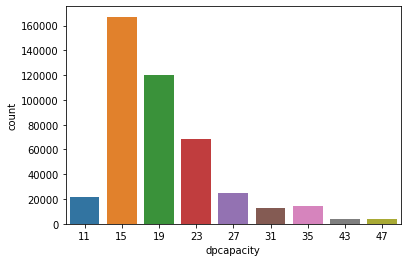

In [30]:
sns.countplot(x= 'dpcapacity', data = merged_df_from)

In [31]:
correlationfrom = merged_df_from.corr()

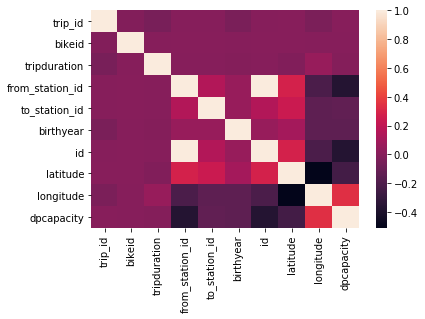

In [32]:
sns.heatmap(correlationfrom)

In [33]:
#trip duration is not that correlated with dpcapacity at the from location but rather more correlated with longitude according to the heat map

In [34]:
correlationto = merged_df_to.corr()

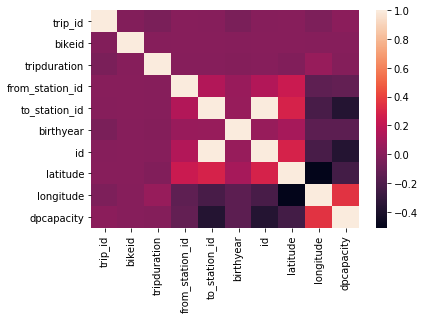

In [35]:
sns.heatmap(correlationto)

In [36]:
#same results as the first table


Decided to change dpcapacity to a object type since it is more of a class type rather than a numeric type.

In [37]:
merged_df_from['dpcapacity'] = merged_df_from['dpcapacity'].astype('object')

In [38]:
merged_df_from.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                        int64
tripduration                  int64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
id                            int64
name                         object
latitude                    float64
longitude                   float64
dpcapacity                   object
dateCreated                  object
dtype: object

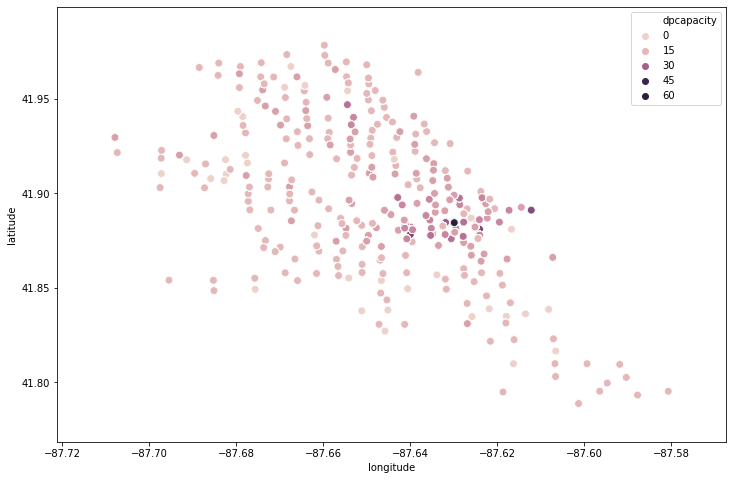

In [39]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x=merged_df_from['longitude'], y=merged_df_from['latitude'], hue = merged_df_from['dpcapacity'], s = 60)

This scatterplot shows that dpcapacity is extremely dense in between the longitude of -87.64 and -87.62 and between latitude 41.90 and 41.85.

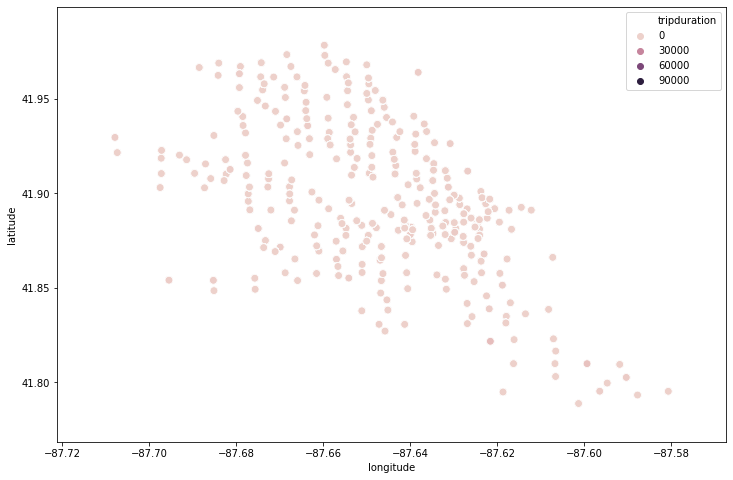

In [40]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x=merged_df_from['longitude'], 
                y=merged_df_from['latitude'], 
                hue = merged_df_from['tripduration'], 
                s = 60)

A location scatterplot color mapped by trip duration does not show us much. This is probably because of heavy outliers in the trip duration. Let's try to replot this by limiting the range of the trip duration.

In [41]:
limiteddurationdf_from = merged_df_from[merged_df_from['tripduration'] < 1000]

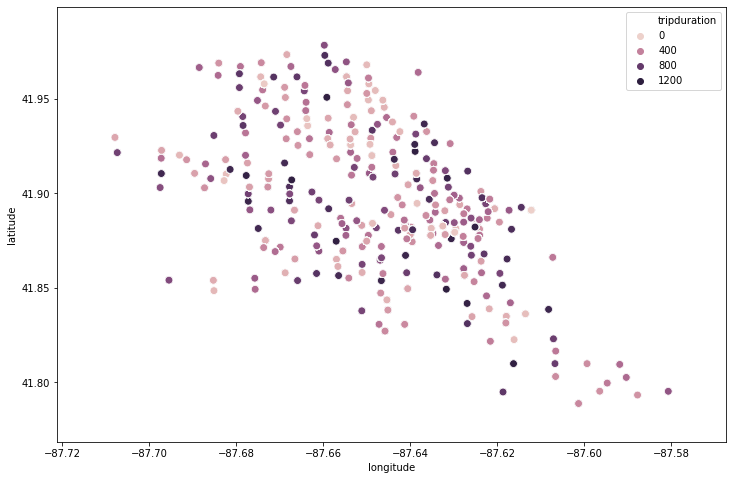

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x=limiteddurationdf_from['longitude'], 
                y=limiteddurationdf_from['latitude'], 
                hue = limiteddurationdf_from['tripduration'], 
                s = 60)

Can't interpret much from the location vs trip duration graph.

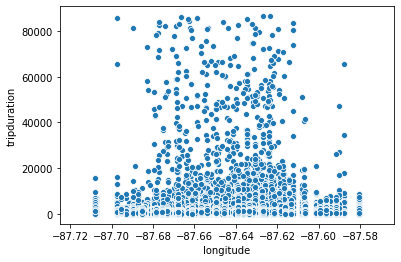

In [43]:
sns.scatterplot(x=merged_df_from['longitude'], y=merged_df_from['tripduration'])

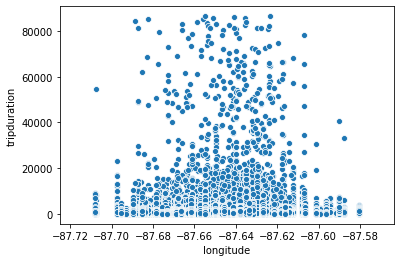

In [44]:
sns.scatterplot(x=merged_df_to['longitude'], y=merged_df_from['tripduration'])

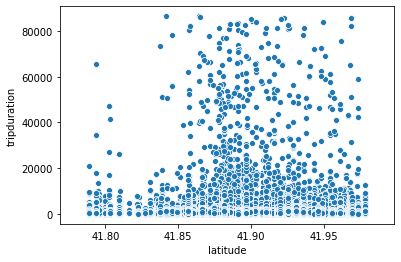

In [45]:
sns.scatterplot(x=merged_df_from['latitude'], y=merged_df_from['tripduration'])

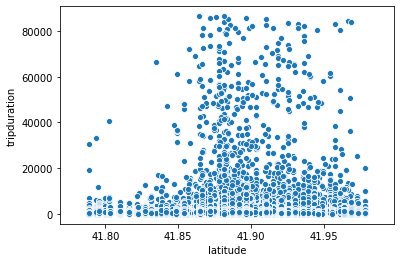

In [46]:
sns.scatterplot(x=merged_df_to['latitude'], y=merged_df_from['tripduration'])

The high trip duration are heavily centralized on longitudes in between -87.68 and -87.60 and on latitudes in between 41.85 and 41.90. So far data visualization has shown that there is hardly a difference between the from and the to location so we're just going to stick with the first dataset.

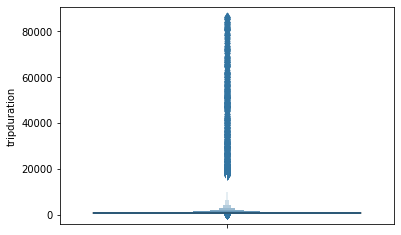

In [47]:
sns.boxenplot(y = merged_df_from['tripduration'])

The boxplot shows that trip duration is heavily skewed because of strong outliers. It's time to suppress the visualization of those outliers.

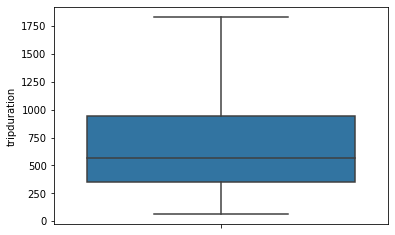

In [52]:
sns.boxplot(y = merged_df_from['tripduration'],showfliers = False)

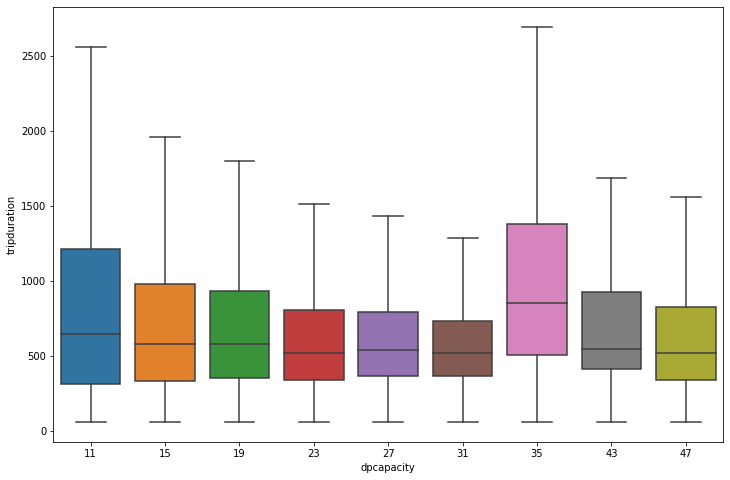

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x=merged_df_from['dpcapacity'], y=merged_df_from['tripduration'],showfliers = False)

This is the box plot of tripduration separated by dpcapacity. It shows that dpcapacity has extreme trip durations at dpcapacity 35. This is interesting to look into. The trip duration continuously increases as dpcapacity decreases. The reason the correlation heatmap plot was not able to pick up on this is because of the presence of huge outliers in the data. The graph suppresses visualizations of outliers and gives helpful insight into dpcapacity vs tripduration. 

According to data visualization, trip duration is inversely proportional to dpcapacity and the highest trip durations occur in the range of longitudes of -87.68 and -87.60 and on latitudes in between 41.85 and 41.90. We can filter out the dataset and see what bike dock stations lie within these ranges so the city could implement more bike docks in these areas.

In [96]:
needsmorebikedocks = merged_df_from[merged_df_from['latitude'].between(41.85,41.90) & merged_df_from['longitude'].between(-87.68,-87.60)] 



In [97]:
needsmorebikedocks.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,id,name,latitude,longitude,dpcapacity,dateCreated
1559,4413166,2014-12-31 23:50:00,2014-12-31 23:52:00,1153,161,264,Stetson Ave & South Water St,44,State St & Randolph St,Subscriber,Male,1984.0,264,Stetson Ave & South Water St,41.886835,-87.62232,19,9/3/2013 15:12
1560,4413062,2014-12-31 20:08:00,2014-12-31 20:18:00,1134,624,264,Stetson Ave & South Water St,76,Lake Shore Dr & Monroe St,Subscriber,Male,1977.0,264,Stetson Ave & South Water St,41.886835,-87.62232,19,9/3/2013 15:12
1561,4412602,2014-12-31 15:37:00,2014-12-31 15:46:00,3019,539,264,Stetson Ave & South Water St,174,Canal St & Madison St,Subscriber,Male,1969.0,264,Stetson Ave & South Water St,41.886835,-87.62232,19,9/3/2013 15:12
1562,4412594,2014-12-31 15:33:00,2014-12-31 15:40:00,2396,398,264,Stetson Ave & South Water St,287,Franklin St & Arcade Pl,Subscriber,Male,1975.0,264,Stetson Ave & South Water St,41.886835,-87.62232,19,9/3/2013 15:12
1563,4412252,2014-12-31 13:49:00,2014-12-31 14:05:00,2004,960,264,Stetson Ave & South Water St,169,Canal St & Harrison St,Subscriber,Female,1979.0,264,Stetson Ave & South Water St,41.886835,-87.62232,19,9/3/2013 15:12


Here are the list of bike dock station names that could use more bike docks.

In [98]:
needsmorebikedocks = needsmorebikedocks[(needsmorebikedocks['dpcapacity'] == 11) | (needsmorebikedocks['dpcapacity'] == 35 )]

In [99]:
needsmorebikedocks.from_station_name.unique()

array(['Damen Ave & Chicago Ave', 'Loomis St & Jackson Blvd',
       'Wabash Ave & Grand Ave', 'Damen Ave & Grand Ave',
       'Halsted St & 21st St', 'Morgan St & 18th St',
       'Blue Island Ave & 18th St', 'Loomis St & Taylor St',
       'Wentworth Ave & Archer Ave', 'Lake Shore Dr & Monroe St',
       'Hermitage Ave & Polk St', 'Paulina St & 18th St',
       'Damen Ave & Augusta Blvd', 'Sangamon St & Washington Blvd',
       'Fairbanks Ct & Grand Ave', 'Franklin St & Quincy St',
       'Canal St & Harrison St', 'May St & Fulton St',
       'Clinton St & 18th St', 'State St & Kinzie St', 'McCormick Place',
       'Ogden Ave & Race Ave', 'Loomis St & Lexington St',
       'Ogden Ave & Congress Pkwy', 'Wood St & Taylor St',
       'May St & Randolph St', 'LaSalle St & Washington St',
       'May St & Taylor St', 'Damen Ave & Cullerton St',
       'Mies van der Rohe Way & Chicago Ave', 'Morgan Ave & 14th Pl',
       'Racine Ave & 13th St', 'Wolcott Ave & Polk St',
       'Wabash Ave &